# Table of Contents
 <p><div class="lev1 toc-item"><a href="#BONUS" data-toc-modified-id="BONUS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>BONUS</a></div><div class="lev2 toc-item"><a href="#Importing-datasets" data-toc-modified-id="Importing-datasets-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing datasets</a></div><div class="lev3 toc-item"><a href="#Emails.csv" data-toc-modified-id="Emails.csv-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Emails.csv</a></div><div class="lev3 toc-item"><a href="#EmailReceivers.csv" data-toc-modified-id="EmailReceivers.csv-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>EmailReceivers.csv</a></div><div class="lev2 toc-item"><a href="#Building-the-graph" data-toc-modified-id="Building-the-graph-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Building the graph</a></div><div class="lev3 toc-item"><a href="#Construct-adjacency-matrix" data-toc-modified-id="Construct-adjacency-matrix-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Construct adjacency matrix</a></div><div class="lev3 toc-item"><a href="#Construct-and-plotting-graph-from-adjacency-matrix" data-toc-modified-id="Construct-and-plotting-graph-from-adjacency-matrix-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Construct and plotting graph from adjacency matrix</a></div><div class="lev3 toc-item"><a href="#Some-netxwork-metrics" data-toc-modified-id="Some-netxwork-metrics-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Some netxwork metrics</a></div><div class="lev4 toc-item"><a href="#You-can-see-that-degree-and-betwenness-centralities-have-broad-distributions..." data-toc-modified-id="You-can-see-that-degree-and-betwenness-centralities-have-broad-distributions...-1231"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>You can see that degree and betwenness centralities have broad distributions...</a></div><div class="lev4 toc-item"><a href="#...-and-they-are-very-well-correlated-(-$\rho=0.97$-)" data-toc-modified-id="...-and-they-are-very-well-correlated-(-$\rho=0.97$-)-1232"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>... and they are very well correlated ( <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax MathJax_Processing" id="MathJax-Element-1-Frame" tabindex="0"></span><script type="math/tex" id="MathJax-Element-1">\rho=0.97</script> )</a></div><div class="lev4 toc-item"><a href="#Distribution-of-clutering-coefficient:" data-toc-modified-id="Distribution-of-clutering-coefficient:-1233"><span class="toc-item-num">1.2.3.3&nbsp;&nbsp;</span>Distribution of clutering coefficient:</a></div><div class="lev4 toc-item"><a href="#Investigate-correlation-between-clustering-coefficient-and-betwenness-centrality:" data-toc-modified-id="Investigate-correlation-between-clustering-coefficient-and-betwenness-centrality:-1234"><span class="toc-item-num">1.2.3.4&nbsp;&nbsp;</span>Investigate correlation between clustering coefficient and betwenness centrality:</a></div><div class="lev3 toc-item"><a href="#Commnunity-detection" data-toc-modified-id="Commnunity-detection-124"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Commnunity detection</a></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# BONUS

## Importing datasets

### Emails.csv

In [2]:
mails_df = pd.read_csv('hillary-clinton-emails/Emails.csv')

print(mails_df.shape)
# print(mails_df.dtypes)
# print(mails_df.isnull().sum())
mails_df.head(3)

(7945, 22)


Id  DocNumber                                    MetadataSubject  \
0   1  C05739545                                                WOW   
1   2  C05739546  H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...   
2   3  C05739547                                      CHRIS STEVENS   

  MetadataTo       MetadataFrom  SenderPersonId           MetadataDateSent  \
0          H  Sullivan, Jacob J            87.0  2012-09-12T04:00:00+00:00   
1          H                NaN             NaN  2011-03-03T05:00:00+00:00   
2         ;H    Mills, Cheryl D            32.0  2012-09-12T04:00:00+00:00   

        MetadataDateReleased  \
0  2015-05-22T04:00:00+00:00   
1  2015-05-22T04:00:00+00:00   
2  2015-05-22T04:00:00+00:00   

                                     MetadataPdfLink MetadataCaseNumber  \
0  DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...       F-2015-04841   
1  DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...       F-2015-04841   
2  DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...       F-2015-04841   

                         ...                         ExtractedTo  \
0                        ...                                 NaN   
1                        ...                                 NaN   
2                        ...                                  B6   

                              ExtractedFrom   ExtractedCc  \
0  Sullivan, Jacob J <Sullivan11@state.gov>           NaN   
1                                       NaN           NaN   
2       Mills, Cheryl D <MillsCD@state.gov>  Abedin, Huma   

                        ExtractedDateSent ExtractedCaseNumber  \
0  Wednesday, September 12, 2012 10:16 AM        F-2015-04841   
1                                     NaN        F-2015-04841   
2  Wednesday, September 12, 2012 11:52 AM        F-2015-04841   

  ExtractedDocNumber ExtractedDateReleased ExtractedReleaseInPartOrFull  \
0          C05739545            05/13/2015              RELEASE IN FULL   
1          C05739546            05/13/2015              RELEASE IN PART   
2          C05739547            05/14/2015              RELEASE IN PART   

                                   ExtractedBodyText  \
0                                                NaN   
1  B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...   
2                                                Thx   

                                             RawText  
0  UNCLASSIFIED\nU.S. Department of State\nCase N...  
1  UNCLASSIFIED\nU.S. Department of State\nCase N...  
2  UNCLASSIFIED\nU.S. Department of State\nCase N...  

[3 rows x 22 columns]

Chech that _every row is indeed an email_:

In [3]:
mails_df.Id.value_counts().value_counts()

1    7945
Name: Id, dtype: int64

What is missing in the _EmailReceivers.csv_ dataset, is the _sender_.  
Therefore, we investigate here that feature:

In [4]:
print('num. of non NaN:',mails_df.SenderPersonId.isnull().sum())
print('number of email sent by Clinton:',sum(mails_df.SenderPersonId==80))

num. of non NaN: 157
number of email sent by Clinton: 1993


Check also the quality (number of nan) of the CC field:

In [5]:
mails_df.ExtractedCc.isnull().sum()
mails_df.ExtractedTo.isnull().sum()

4657

### EmailReceivers.csv

In [6]:
receivers_df = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')

# remove uselss col
receivers_df.drop('Id',1,inplace=True)

# printing shape, data type and number of null values
print(receivers_df.shape)
print(receivers_df.dtypes)
print(receivers_df.isnull().sum())
receivers_df.head()

(9306, 2)
EmailId     int64
PersonId    int64
dtype: object
EmailId     0
PersonId    0
dtype: int64


EmailId  PersonId
0        1        80
1        2        80
2        3       228
3        3        80
4        4        80

In [7]:
print('number of unique receivers:',receivers_df.PersonId.nunique())
print('number of unique emails:',receivers_df.EmailId.nunique())

# '80'  is clinton ID
print('number of emaild were clinton was recevier:',sum(receivers_df.PersonId==80))
print('number of emaild were clinton NOT was recevier - it should be:',
      receivers_df.EmailId.nunique()-sum(receivers_df.PersonId==80))

number of unique receivers: 418
number of unique emails: 7676
number of emaild were clinton was recevier: 5587
number of emaild were clinton NOT was recevier - it should be: 2089


...here we get some weird result:

In [8]:
clinton_sender = []

for m in receivers_df.EmailId.unique():
    
    if 80 not in list(receivers_df.PersonId[receivers_df.EmailId==m]):
        
        clinton_sender.append(m)
        

print('number of emails in which clinton was NOT a receiver:',len(clinton_sender))

number of emails in which clinton was NOT a receiver: 2100


Check that numbers on  clinton's emails match in the 2 datasets:  
...and they __don't__

In [9]:
sum(mails_df.SenderPersonId==80)

1993

Check that she is indeed the sender in the _Emails.csv_ dataset:

In [10]:
bad_mails = []
for m in clinton_sender:
    
    if 80 not in list(mails_df[mails_df.Id==m].SenderPersonId):
        
        bad_mails.append(m)

print('there are issues with sender for',len(bad_mails),'emails')

there are issues with sender for 151 emails


## Building the graph

### Construct adjacency matrix

Here we first try to define the graph _only_ with _EmailReceivers.csv_ dataset:  
__link weights__ = number of email shared by two recipients

We consturct the adjacency matrix using a _dictionary_ from PeronsId:

In [11]:
persons_dic = dict.fromkeys(receivers_df.PersonId.unique())

In [12]:
# 'from_dict_of_dicts' way to construct the graph

for r in persons_dic.keys():
    
    r_friends = []
    for m in receivers_df.EmailId[receivers_df.PersonId==r].unique():
        
        r_friends += list(receivers_df.PersonId[(receivers_df.EmailId==m) & (receivers_df.PersonId!=r)].unique())
        
    persons_dic[r] = r_friends

### Construct and plotting graph from adjacency matrix

In [14]:
clinton_graph = nx.from_dict_of_lists(persons_dic)

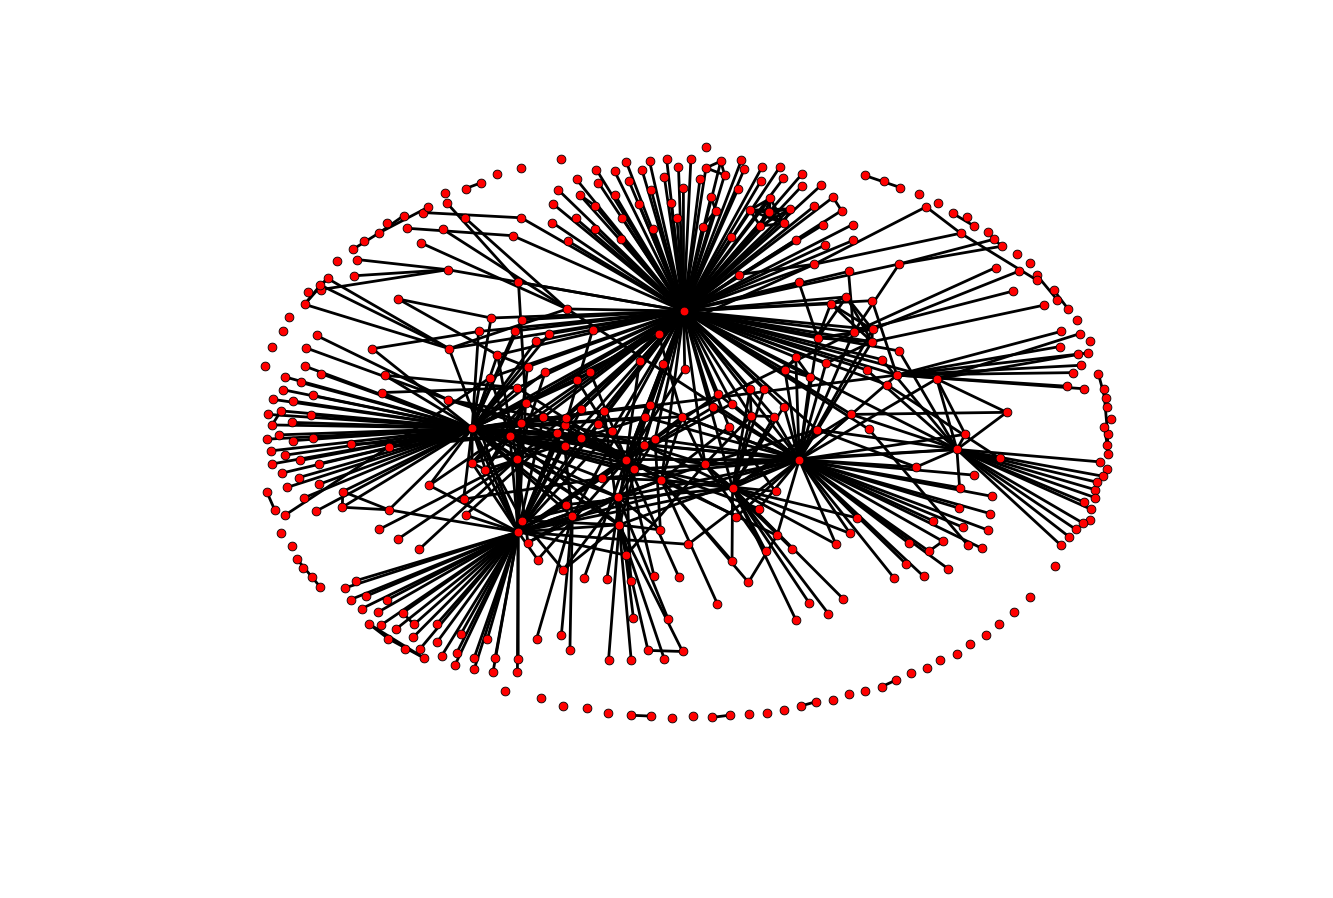

In [15]:
nx.draw_spring(clinton_graph,node_size=10)

### Some netxwork metrics

In [16]:
node_cent = pd.DataFrame()
node_cent['degree_cen'] = list(nx.degree_centrality(clinton_graph).values())
node_cent['bet_cen'] = list(nx.betweenness_centrality(clinton_graph).values())

#### You can see that degree and betwenness centralities have broad distributions...

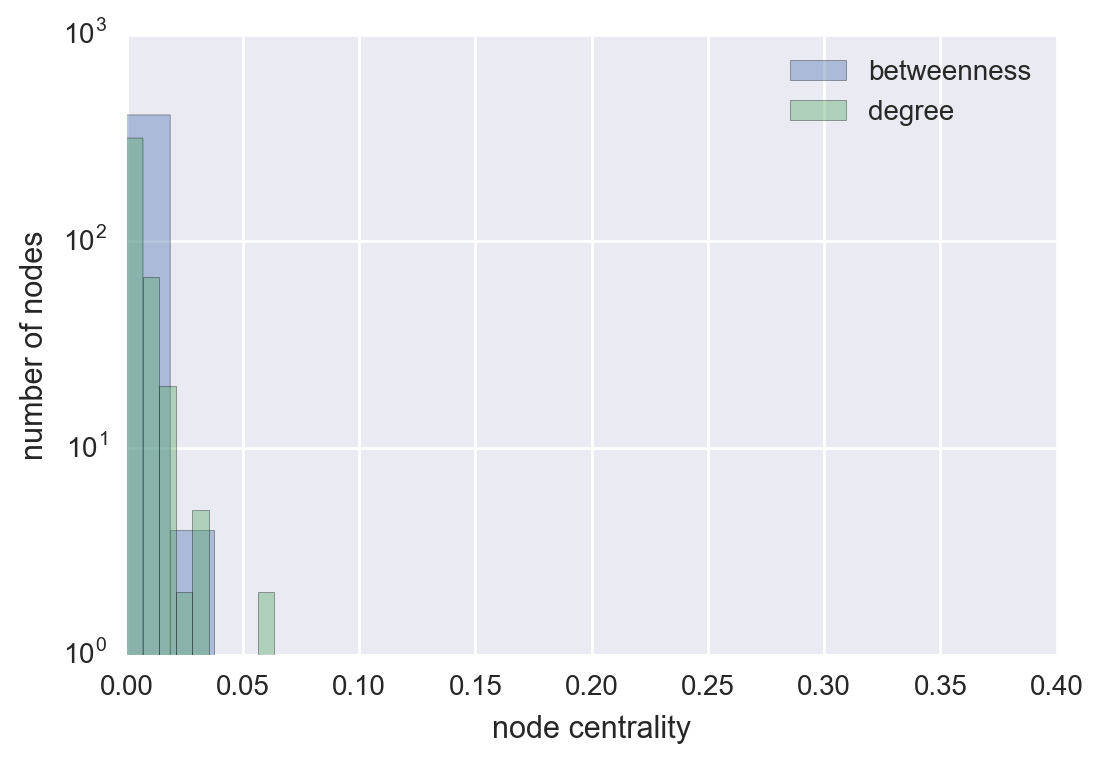

In [17]:
# plt.loglog(clinton_deg.degree_cen.value_counts(), 
#           marker= '.',linestyle='',label='degree')
# plt.loglog(clinton_bet.bet_cen.value_counts(),
#           marker= '.',linestyle='',label='betweenness')

sns.distplot(node_cent.bet_cen,label='betweenness',kde=False)
sns.distplot(node_cent.degree_cen,label='degree',kde=False)

plt.yscale('log')
# plt.xscale('log')
plt.ylabel('number of nodes')
plt.xlabel('node centrality')
plt.legend()

#### ... and they are very well correlated ( $\rho=0.97$ )  

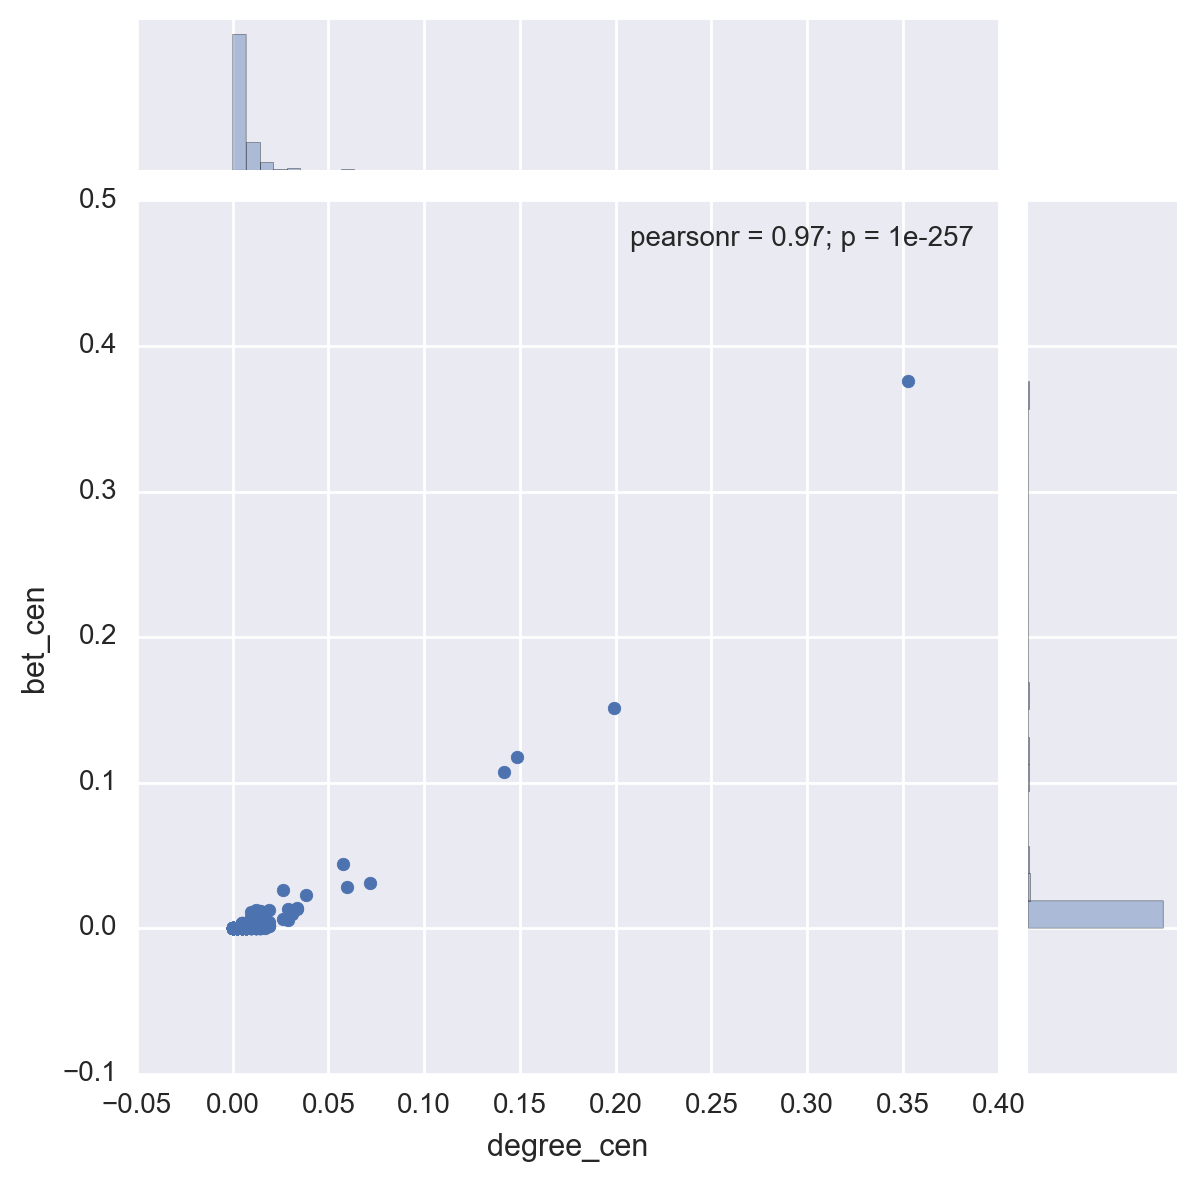

In [18]:
sns.jointplot(node_cent.degree_cen,node_cent.bet_cen)

#### Distribution of clutering coefficient:  
as we can see from the plot below, it shows a _bimodal_ shape

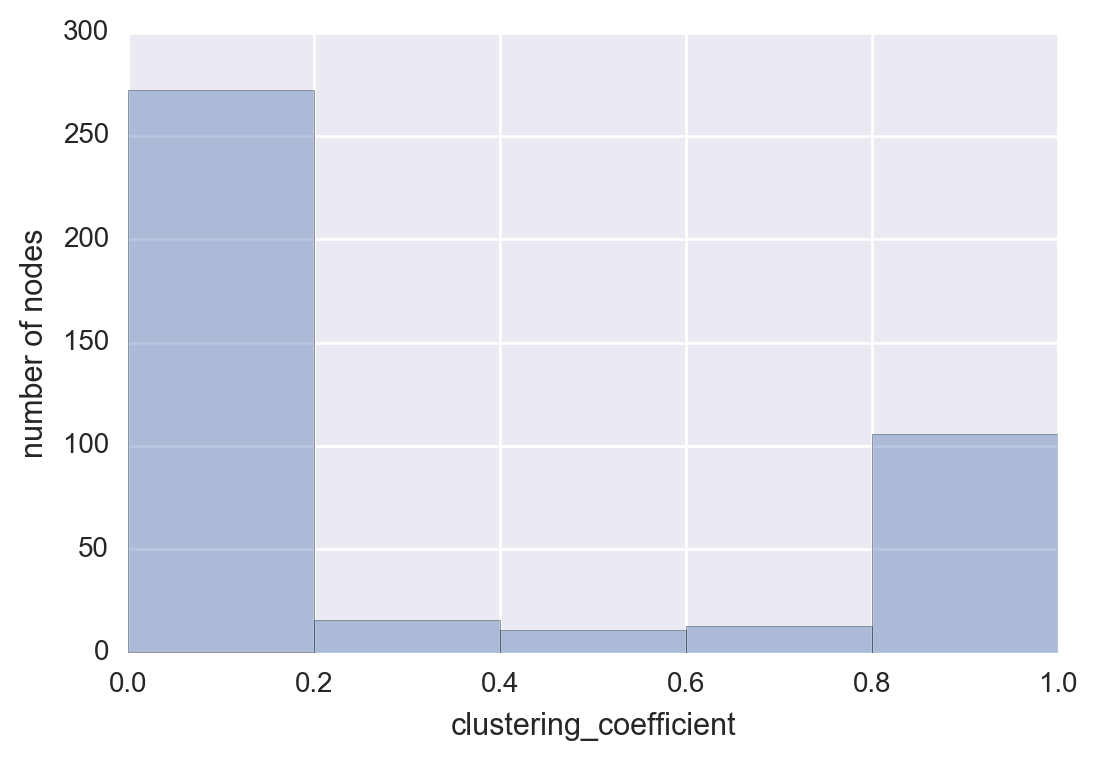

In [19]:
clinton_cc = nx.clustering(clinton_graph)

sns.distplot(list(clinton_cc.values()),kde=False)

plt.xlabel('clustering_coefficient')
plt.ylabel('number of nodes')

#### Investigate correlation between clustering coefficient and betwenness centrality:

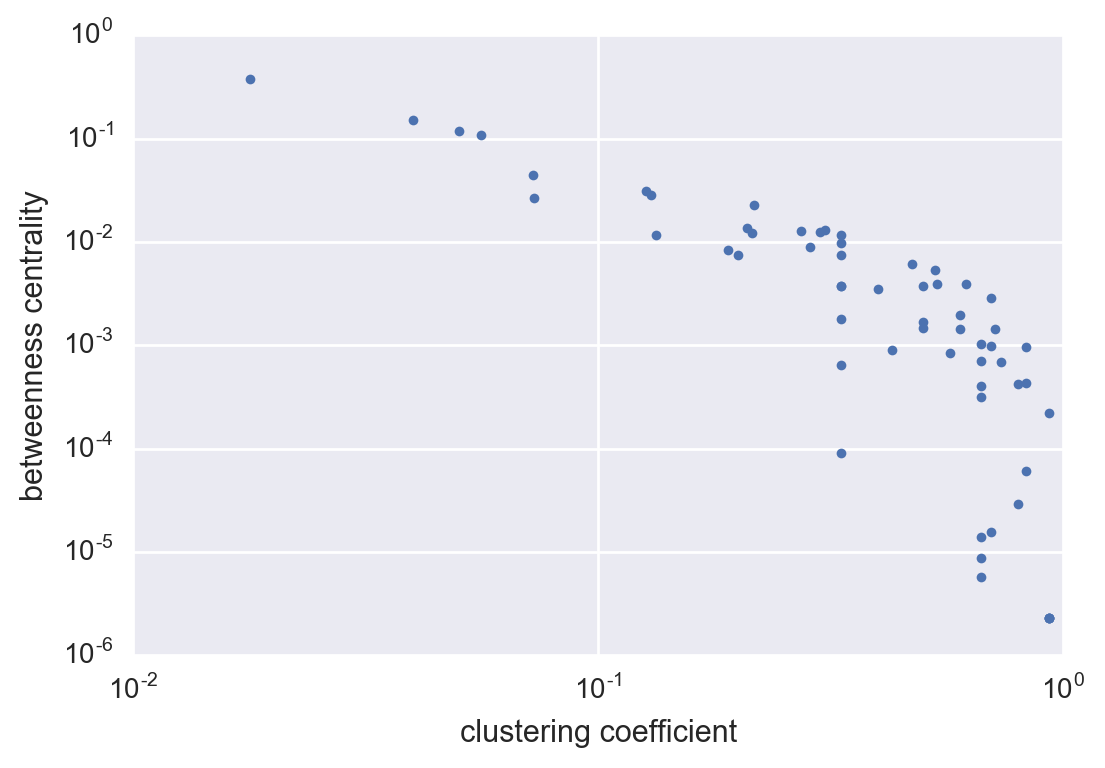

In [20]:
plt.loglog(list(clinton_cc.values()),node_cent.bet_cen,marker='.',linestyle='')

plt.xlabel('clustering coefficient')
plt.ylabel('betweenness centrality')

### Commnunity detection

In [21]:
import community

In [22]:
#first compute the best partition
partition = community.best_partition(clinton_graph)

Mind that this library (the `community` library uses the Louvain algorithm) finds:

In [23]:
print('number of communities:', len(set(partition.values())))

number of communities: 83


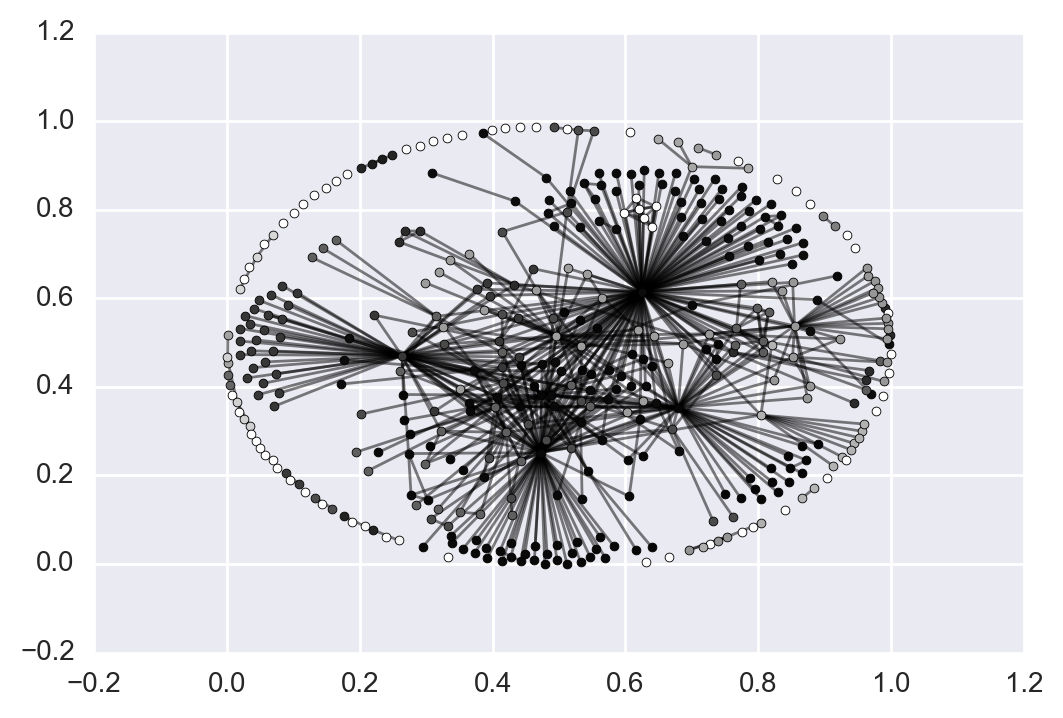

In [24]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(clinton_graph)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(clinton_graph, pos, list_nodes, node_size = 10,
                                node_color = str(count / size))


nx.draw_networkx_edges(clinton_graph,pos, alpha=0.5)
plt.show()